In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report

In [128]:
train_data = pd.read_csv('archive/sign_mnist_train.csv')
test_data = pd.read_csv('archive/sign_mnist_test.csv')

In [129]:
train_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [130]:
def basic_req(data):
    print(f"Duplicates: {data.duplicated().sum()}\n")
    print(f"Null Values: \n{data.isnull().sum()}\n")
    print(f"Shape: {data.shape}\n")
    print(f"Summary: {data.describe()}")

In [131]:
basic_req(train_data)

Duplicates: 0

Null Values: 
label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

Shape: (27455, 785)

Summary:               label        pixel1        pixel2        pixel3        pixel4  \
count  27455.000000  27455.000000  27455.000000  27455.000000  27455.000000   
mean      12.318813    145.419377    148.500273    151.247714    153.546531   
std        7.287552     41.358555     39.942152     39.056286     38.595247   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        6.000000    121.000000    126.000000    130.000000    133.000000   
50%       13.000000    150.000000    153.000000    156.000000    158.000000   
75%       19.000000    174.000000    176.000000    178.000000    179.000000   
max       24.000000    255.000000    255.000000    255.000000    255.000000   

             pixel5        pixel6        pixel7 

In [132]:
X_train = train_data.drop(columns=['label'])
y_train = train_data.label.values
X_test = test_data.drop(columns=['label'])
y_test = test_data.label.values

In [133]:
np.unique(y_train)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

In [134]:
#  to aviod the problem because there is no class in number 9 so we shift the indices 
label_mapping = {
    0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8,
    10: 9, 11: 10, 12: 11, 13: 12, 14: 13, 15: 14, 16: 15,
    17: 16, 18: 17, 19: 18, 20: 19, 21: 20, 22: 21, 23: 22, 24: 23
}

# Remap the labels
y_train = np.array([label_mapping[label] for label in y_train])
y_test = np.array([label_mapping[label] for label in y_test])

In [135]:
X_train = X_train / 255
X_test = X_test / 255

#### Imp. read this before running the next step
.reshape(): The .reshape() function is used to change the shape of a NumPy array without altering its data.

-1: The -1 is a placeholder that automatically calculates the appropriate size for this dimension based on the total number of elements in the array and the other dimensions specified. In this context, it likely refers to the number of images in the training set.

28, 28: This specifies the height and width of the images. Each image in the dataset is assumed to have dimensions of 28x28 pixels (common in datasets like MNIST).

1: This indicates the number of channels. A value of 1 signifies that the images are grayscale, meaning they have only one color channel. For color images, this would be 3 (for RGB channels).

In [136]:
# Why Is This Important?
# Compatibility with CNNs
# CNNs expect input in the form of 3D arrays for each image (height, width, channels). Reshaping ensures the data matches this format.

# Efficient Processing:
# Ensures uniformity in the shape of the data, which is critical for batch processing during model training.

# Prepares Data for Further Operations:
# After reshaping, the data is ready for normalization, augmentation, or direct input into a CNN.

In [137]:
X_train = X_train.values.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28,1)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

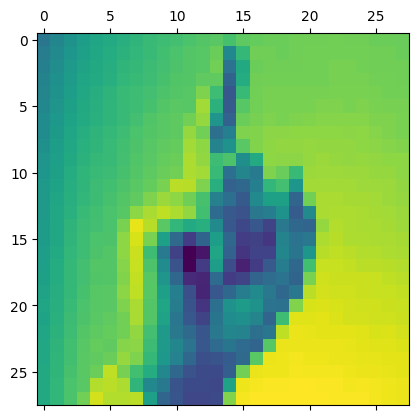

In [138]:
plt.matshow(X_train[0])

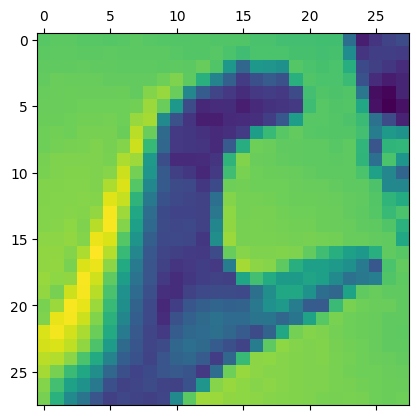

In [139]:
plt.matshow(X_train[2])

In [140]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [141]:
datagen = ImageDataGenerator(
    rotation_range = 10,
    zoom_range = 0.1,
    width_shift_range = 0.1,
    height_shift_range = 0.1
)

In [142]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape = (28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(24, activation='softmax')
])

model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

c:\Users\Ayush R\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [143]:
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    epochs=20,
    validation_data=(X_val, y_val)
)

Epoch 1/20


c:\Users\Ayush R\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


687/687 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.1056 - loss: 2.9474 - val_accuracy: 0.6421 - val_loss: 1.2728
Epoch 2/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.4316 - loss: 1.7223 - val_accuracy: 0.7753 - val_loss: 0.6928
Epoch 3/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5956 - loss: 1.1990 - val_accuracy: 0.8514 - val_loss: 0.4518
Epoch 4/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6583 - loss: 0.9791 - val_accuracy: 0.9051 - val_loss: 0.2890
Epoch 5/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7229 - loss: 0.7877 - val_accuracy: 0.9459 - val_loss: 0.2099
Epoch 6/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.7575 - loss: 0.6916 - val_accuracy: 0.9636 - val_loss: 0.1516
Epoch 7/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.7804 - loss: 0.6160 - val_accuracy: 0.9734 - val_loss: 0.1075
Epoch 8/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8092 - loss: 0.5429 - val_accuracy: 0.9785 - val

In [144]:
model.evaluate(X_test, y_test)

225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9954 - loss: 0.0156


[0.014484254643321037, 0.996374785900116]

In [ ]:
y_pred = model.predict(X_test)
y_pred = [np.argmax(i) for i in y_pred]
y_pred[:5]

225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


[6, 5, 9, 0, 3]

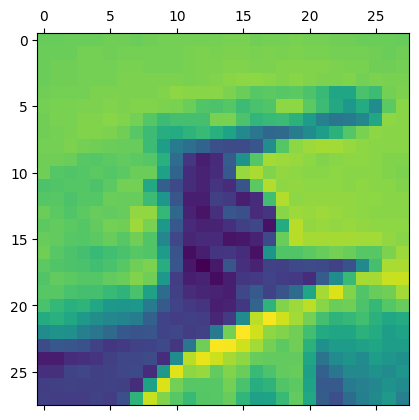

In [146]:
plt.matshow(X_test[0])

In [149]:
import pickle
with open('sign_language_file', 'wb') as f:
    pickle.dump(model, f)

with open('sign_language_file', 'rb') as f:
    mp = pickle.load(f)